<a href="https://www.kaggle.com/code/krishnaprasad2608/product-sales-analysis?scriptVersionId=173074961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction:**
# 
* Founded in 1984, Pens and Printers supplies high-quality office products to large organizations.
* Specializing in everything from pens and notebooks to desk chairs and monitors, the company sources products from various manufacturers.
* The business has forged enduring relationships with customers who trust in the delivery of optimal products.
* Adapting to changing consumer buying patterns, dynamic sales tactics become imperative, especially for new product lines like the recently launched office stationery.
* Effective sales strategies are crucial for cost-efficiently introducing and selling new products.
* Despite the digital shift, there remains a demand for traditional office supplies, with a recent focus on tools for creativity and brainstorming.
* Testing different sales approaches, including targeted emails, phone calls, and their combination, is essential to quickly determine what works for each new product.

# **Variable Description:**

Week:
* Contains 6 unique values ranging from 1 to 6.
* Represents the week number, requiring no additional cleaning.

Sales_method:
* Encompasses 3 unique methods: Call, Email, and Email+Call.
* Corrections were made, including the transformation of 23 instances of "em + call" and 10 instances of "email."

Customer_id:
* Character variable without missing values.
* Identifies the unique identifier for each customer.

Nb_sold:
* Categorized into 10 numeric values ranging from 7 to 16.
* Represents the number of items sold, providing insights into sales quantity.

Revenue:
* Comprises numeric values with 1074 missing entries.
* Represents the financial revenue generated, with attention required for missing data.

Years_as_customer:
* Holds numeric values, with two outliers identified at 47 and 63 years.
* Signifies the duration of customers' association with the store, considering the store's existence since 1984.

Nb_site_visits:
* Contains numeric values without any missing entries.
* Represents the number of visits to the store's website, offering insights into customer engagement.

State:
* Offers 50 possible values without any missing data.
* Indicates the geographic location or state associated with each record, contributing to regional analysis.

# Importing required packages:

In [1]:
# Import necessary libraries
import pandas as pd  # For handling data in tabular form
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical visualizations
import numpy as np  # For numerical operations

In [2]:
# Read CSV file into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/product-sales/product_sales.csv')

In [3]:
# Display the first 5 rows of the DataFrame
df.head(5)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
# Generate descriptive statistics for the DataFrame
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
# Get the number of rows in the DataFrame
len(df)

15000

# Data Cleaning:

We can see that the total number of rows in the dataset is 15000, but revenue column only has 13926 non null entries.

In [6]:
#replacing the null values with median value
median_value = df['revenue'].median()
df['revenue'].fillna(median_value,inplace = True)

In [7]:
# Group the DataFrame by 'sales_method' and calculate the count of each group
sales_method = df.groupby('sales_method').size().reset_index(name='Count')

# Display the resulting DataFrame
sales_method

,sales_method,Count
0,Call,4962
1,Email,7456
2,Email + Call,2549
3,em + call,23
4,email,10


There are inconsistent entries in the data that needs to be addressed.

In [8]:
##Standardizing inconsistent entries in sales method column
df["sales_method"] = df["sales_method"].replace("em + call", "Email + Call")
df["sales_method"] = df["sales_method"].replace("email", "Email")

In [9]:
# Group the DataFrame by 'sales_method' and calculate the count of each group
sales_method = df.groupby('sales_method').size().reset_index(name='Count')

# Display the resulting DataFrame
sales_method

,sales_method,Count
0,Call,4962
1,Email,7466
2,Email + Call,2572


## **How many customers were there for each approach?**

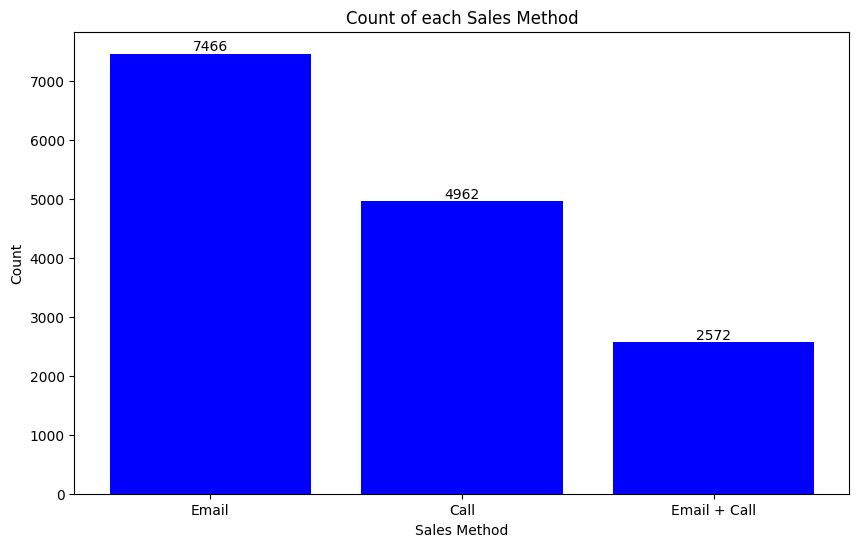

In [10]:
# Sort the 'sales_method' DataFrame by count in descending order
sales_method = sales_method.sort_values(by='Count', ascending=False)

# Create a bar plot to visualize the count of each sales method
plt.figure(figsize=(10, 6))
plt.bar(sales_method['sales_method'], sales_method['Count'], color='blue')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.title('Count of each Sales Method')

# Add text labels on top of each bar
ax = plt.gca() 
for i, count in enumerate(sales_method['Count']):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


- The most frequent sales method in the dataset is "Email" with a count of 7466. This suggests that email is a commonly used method for sales.

- The second most common sales method is "Call" with a count of 4962. This indicates that phone calls are also a significant method for making sales.

- "Email + Call" represents a combination of email and phone call sales methods, with a count of 2572.

## **What does the spread of the revenue look like overall? And for each method?**

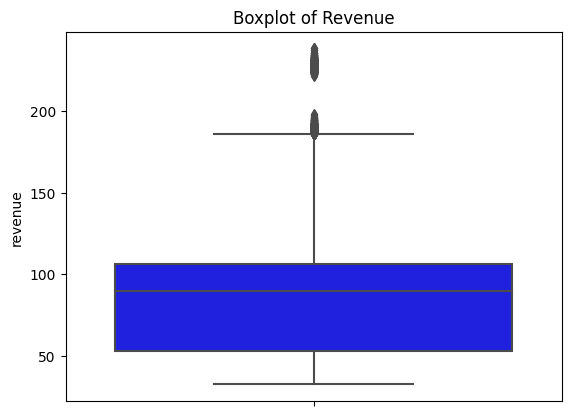

In [11]:
# Create a boxplot to visualize the distribution of 'revenue'
sns.boxplot(y=df['revenue'], color='blue')
plt.title('Boxplot of Revenue')
plt.show()


In [12]:
# Generate descriptive statistics for the 'revenue' column
df['revenue'].describe()

count    15000.000000
mean        93.617401
std         45.719775
min         32.540000
25%         53.040000
50%         89.500000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64

# **Observations:**
- The mean value of the 'revenue' column is 93.61.

- The mean value of the 'revenue' column is 89.5.

- The first quartile (Q1) is 53.0075, indicating that 25% of the data falls below this value. This is the lower edge of the box in the boxplot.

- The third quartile (Q3) is 107.5475, signifying that 75% of the data falls below this value. This is the upper edge of the box in the boxplot.

- There are few outliers in the revenue column, Outliers are data points that fall outside the whiskers

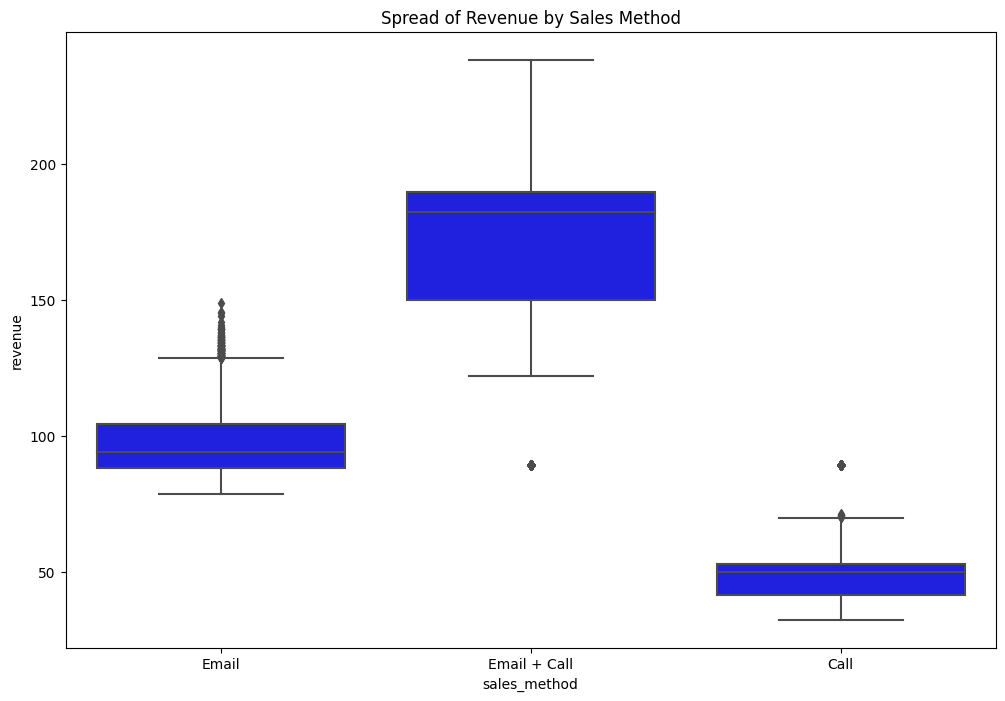

In [13]:
# Create a boxplot to visualize the spread of 'revenue' by 'sales_method'
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['sales_method'], y=df['revenue'], color='blue')
plt.title('Spread of Revenue by Sales Method')
plt.show()

In [14]:
# Calculate descriptive statistics for 'revenue' grouped by 'sales_method'
method_stats = df.groupby('sales_method')['revenue'].describe()

# Print the resulting statistics
print(method_stats)

               count        mean        std    min       25%      50%  \
sales_method                                                            
Call          4962.0   49.125955  11.539040  32.54   41.6300   49.935   
Email         7466.0   96.571903  10.974845  78.83   88.3900   94.275   
Email + Call  2572.0  170.875657  42.084163  89.50  149.8225  182.135   

                   75%     max  
sales_method                    
Call           52.9775   89.50  
Email         104.4600  148.97  
Email + Call  189.5350  238.32  


# **Observations:**
- 'Email + Call' has the highest mean revenue (170.87), followed by 'Email' (96.57), and 'Call' has the lowest mean revenue (49.12).

- 'Email + Call' has the highest standard deviation (42.08), indicating a wider spread of revenue values compared to the other methods.

- 'Call' has the lowest mean revenue (49.12) among the methods, suggesting that, on average, the revenue generated through this method is comparatively lower. The spread of revenue, as indicated by the standard deviation (11.53), is moderate.

- 'Email' has a higher mean revenue (96.57) compared to 'Call', indicating that, on average, the revenue generated through email is higher. The standard deviation (10.97) suggests a moderate spread of revenue values.

- 'Email + Call' has the highest mean revenue (170.87), signifying that, on average, this method yields the highest revenue. The standard deviation (42.08) indicates a wider spread of revenue values, suggesting greater variability.

- Because the email+call method show a high standard deviation, it is better to focus on the median, whichis 182.13. This is agian the highest among all three methods.

**Data Cleaning: **years_As_customer****

In [15]:
# Limit the values in the 'years_as_customer' column to a maximum of 39
df['years_as_customer'] = np.minimum(df['years_as_customer'], 39)

Given the company's founding year in 1984, the maximum duration of customer relationships cannot exceed 39 years. Therefore, any values in the 'years_as_customer' column exceeding 39 are adjusted to 39, ensuring the data aligns with the company's historical timeline. This modification enhances the meaningfulness of the information within the dataset.

## **Was there any difference in revenue over time for each of the methods?**

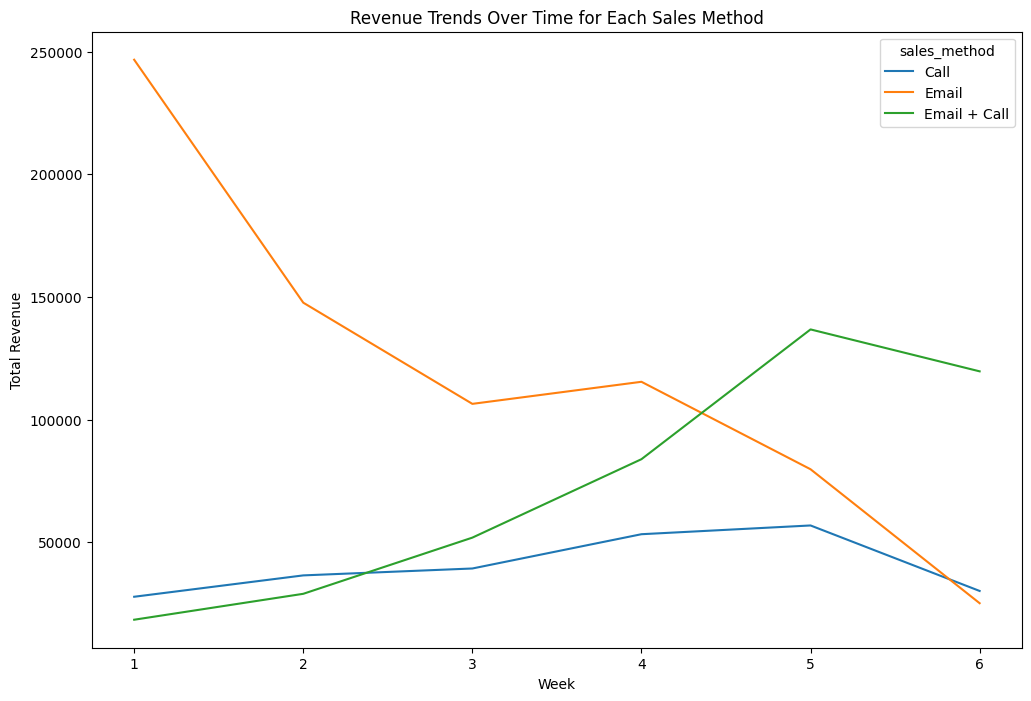

In [16]:
grouped_data = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Create a line plot to visualize revenue trends over time for each sales method
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=grouped_data)
plt.title('Revenue Trends Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.show()


**Analysis:**
- The line chart clearly indicates that the email sales method experienced the highest revenue during the initial week, followed by a consistent decline, reaching its minimum revenue by the sixth week. 
- In contrast, the call method began with lower revenue in the first week but displayed a gradual and steady increase over the entire period.
- The combined email and call method initially generated the lowest revenue. However, as the weeks progressed, it evolved into the highest revenue generator, surpassing both the email and call methods by the end of the six-week period.
- Despite having the fewest observations, the email+call method proved to be the most effective in terms of revenue generation.

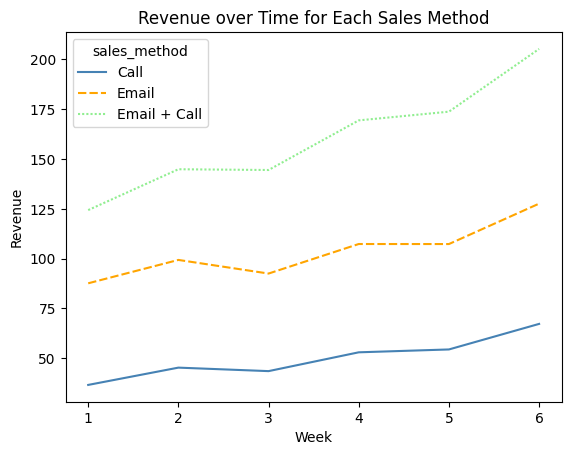

week                   1           2           3           4           5  \
sales_method                                                               
Call           36.636121   45.313068   43.559058   52.998498   54.434492   
Email          87.630924   99.358728   92.521426  107.344995  107.326312   
Email + Call  124.370473  144.858650  144.483677  169.384242  173.753774   

week                   6  
sales_method              
Call           67.259866  
Email         127.607868  
Email + Call  205.239400  


In [17]:
# Create a pivot table to analyze revenue over time for each sales method
revenue_over_time = df.pivot_table(index='sales_method', columns='week', values='revenue', aggfunc='mean')

# Define colors for each sales method
colors = {'Email': 'orange', 'Call': 'steelblue', 'Email + Call': 'lightgreen'}

# Create a line plot to visualize revenue over time for each sales method
sns.lineplot(data=revenue_over_time.T, palette=colors)

# Add title and labels to the plot
plt.title('Revenue over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

# Print 
print(revenue_over_time)


**Analyses:**
- the average revenue for all three methods showed a general increase over time, with the email+call method expereiencing particularly noteworthy growth.
- While each methods experienced minor declines in the third and fifth weeks, the overall trend remained consistently upward.

# **Based on the data,which method would  you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.**

Based on the revenue data, it is recommended that the company prioritize or allocate additional focus to the email + call method. This method demonstrated the highest revenue over the six-week period, and notably, it exhibited a consistent increase in revenue throughout the weeks eventhough it dipped a little after 5th  week in terms of total revenue, but in terms  of average revenue, it gave us an upward trend.

In [18]:
# Calculate revenue and transaction count for each state
state_stats = df.groupby('state')['revenue'].agg(['sum', 'count'])

# Select the top 10 states with the highest total revenue
top_10_states = state_stats.nlargest(10, 'sum')

# Display the resulting DataFrame of top 10 states
top_10_states


,sum,count
state,,
California,172944.39,1872
Texas,113275.45,1187
New York,89149.74,965
Florida,84632.75,904
Illinois,56318.85,617
Pennsylvania,55622.85,598
Ohio,52127.94,566
Michigan,47288.81,498
Georgia,46021.91,489


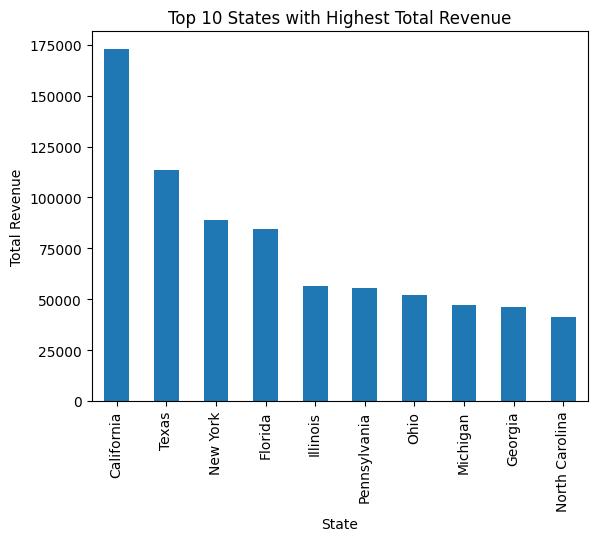

In [19]:
# Create a bar plot to visualize the total revenue for the top 10 states
top_10_states.plot(kind='bar', y='sum', legend=False)
plt.title('Top 10 States with Highest Total Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()


 **Analysis:** The presented graph provides a clear visual representation of revenue generation across different states. Notably, California emerges as a dominant contributor, exhibiting significantly higher revenue compared to other states. California's revenue outshines that of all other states, showcasing a remarkable sum. Upon closer examination, California boasts a substantial customer base, totaling over 1872 individuals. This substantial customer count contributes to the state's impressive revenue figures, establishing it as a key economic driver within the dataset. Following California, the states of Texas and New York also exhibit noteworthy revenue, underscoring their significance in the overall revenue landscape.

In [20]:
# calculating the sum and count of revenue
city_method_stats = df.groupby(['state', 'sales_method'])['revenue'].agg(['sum', 'count'])

# Find the top 10 city
top_city_method = city_method_stats.nlargest(10, 'sum')

# Display the resulting DataFrame 
top_city_method

,,sum,count
state,sales_method,,
California,Email,89070.31,921
Texas,Email,57772.54,598
California,Email + Call,52250.97,309
New York,Email,46042.55,475
Florida,Email,43665.98,452
Texas,Email + Call,36702.76,212
California,Call,31623.11,642
Illinois,Email,30078.04,313
Pennsylvania,Email,29942.35,311


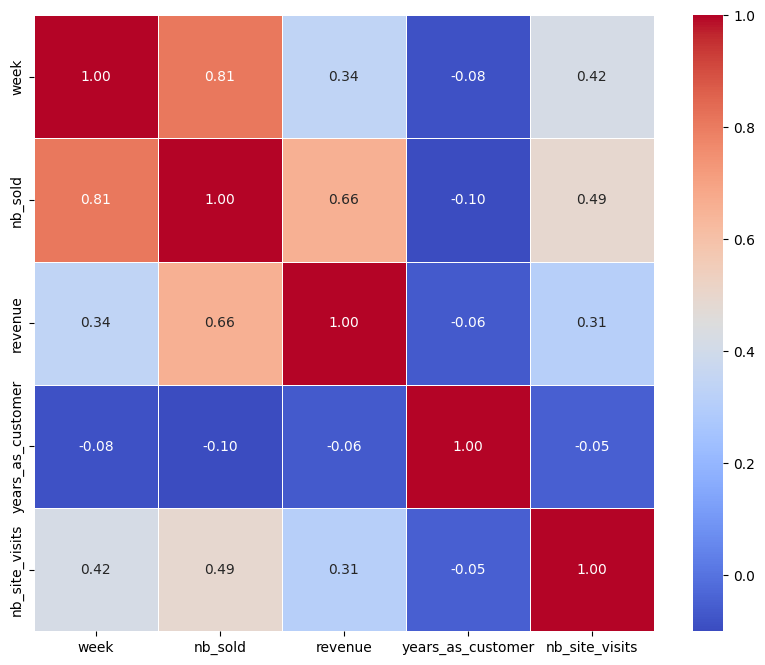

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Revenue is highly correlated with the number of new product sold and number of new product sold is highly correlated to the weeks.

**Recommendations:** The analysis reveals that California takes the lead in terms of revenue, signifying its prominence in contributing to the overall sales performance. Notably, an intriguing finding is the efficacy of the email+call sales method. Despite having a smaller customer base, this method demonstrates a remarkable ability to generate substantial revenue, positioning it as a key and impactful sales strategy. While the email method contributes significantly to the overall revenue in California, it's noteworthy that the email+chat method stands out by generating more than half of the total revenue of email method with just one-third of the customer count in California. This observation underscores the efficiency and effectiveness of the email+chat method, showcasing its potential as a high-impact sales approach within the dataset. This is also the case with the second leading revenue generator which is Texas.

My recommendation, backed by data, advocates investing more in the Email+Call sales method. With top revenue and efficiency, it promises enhanced sales performance and optimal financial returns.

# **Business Metric:**

**Average Revenue Per customer(RPC) by method:**
We can use the Average revenue per customer(RPC) by method as the key business metric which is calculated by dividing the total revenue genrated by that method by total number of sales by that method. This can help gauge the overall effectiveness of sales methods and guide decision-making for new product launches.

In [22]:
# Group by sales method
method_totals = df.groupby('sales_method')['revenue'].sum()
method_counts = df['sales_method'].value_counts()

# Calculate Revenue per Customer (RPC) by dividing total revenue by count
rpc = method_totals / method_counts

# Display the resulting Series of Revenue per Customer
rpc


sales_method
Call             49.125955
Email            96.571903
Email + Call    170.875657
dtype: float64

Analyses: On an average,  Email+call method generates about $171 revenue per customer and is the best among the rest. The above code can be simply run to determine if this trend changes and the business can adopt that method with highest average revenue when a new product is to be launced.

# **Summary:**

* The Email method dominates the dataset in terms of the highest number of observations, contributing to elevated revenue.

* Surprisingly, the Email+Call method achieves over half the revenue of the Email method with significantly fewer observations.

* For the Email+Call method, there's a notable increase in the number of products sold after the initial weeks.

* The data reveals a strong correlation between revenue and the number of new products sold.

* The **recommendation**, based on the data, suggests prioritizing the Email+Call method to amplify revenue.

* **Business Metric:** RPC can be utilized in the future to determine the best method of sales.